In [2]:
pip install langgraph

  Using cached langchain_core-0.3.74-py3-none-any.whl.metadata (5.8 kB)
  Using cached langgraph_checkpoint-2.1.1-py3-none-any.whl.metadata (4.2 kB)
  Using cached pydantic-2.11.7-py3-none-any.whl.metadata (67 kB)
  Using cached xxhash-3.5.0-cp312-cp312-win_amd64.whl.metadata (13 kB)
  Using cached ormsgpack-1.10.0-cp312-cp312-win_amd64.whl.metadata (44 kB)
  Using cached httpx-0.28.1-py3-none-any.whl.metadata (7.1 kB)
  Using cached orjson-3.11.2-cp312-cp312-win_amd64.whl.metadata (1.2 kB)
  Using cached anyio-4.10.0-py3-none-any.whl.metadata (4.0 kB)
  Using cached certifi-2025.8.3-py3-none-any.whl.metadata (2.4 kB)
  Using cached httpcore-1.0.9-py3-none-any.whl.metadata (21 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
  Using cached h11-0.16.0-py3-none-any.whl.metadata (8.3 kB)
  Using cached langsmith-0.4.14-py3-none-any.whl.metadata (14 kB)
  Using cached tenacity-9.1.2-py3-none-any.whl.metadata (1.2 kB)
  Using cached jsonpatch-1.33-py2.py3-none-any.whl.metadata

In [12]:
from typing import Dict, TypedDict
from langgraph.graph import StateGraph

In [18]:
class AgentState(TypedDict): # Our state scehma
    message: str

def greeting_node(state: AgentState) -> AgentState:
    """
    Simple node that adds a greeting message to the state
    """

    state["message"] = state["message"] + "You are doing a fantastic job learning LangGraph"

    return state

In [19]:
graph = StateGraph(AgentState)

graph.add_node("greeter", greeting_node)

graph.set_entry_point("greeter")
graph.set_finish_point("greeter")

app = graph.compile()

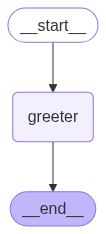

In [20]:
from IPython.display import Image
display(Image(app.get_graph().draw_mermaid_png()))

In [21]:
result = app.invoke({"message": "Bob"})

In [22]:
result["message"]

'BobYou are doing a fantastic job learning LangGraph'